In [1]:
import pandas as pd
import numpy as np
import glob
import re
from Functions import *

In [2]:
# len_prop_arr = np.linspace(200,1500,651)

# RDL
filename = "../data/Vertical_EME/"
len_prop_arr = np.linspace(100,3500,681)

# no RDL
foldername = "../data/Vertical_EME - RDL - long prop/"
len_prop_arr = np.linspace(100,10000,991)     # no-RDL

In [3]:
# 获取所有匹配的文件
filename_list = glob.glob(foldername + 'len_taper_RDL-*.txt')
filename_list

['../data/Vertical_EME - RDL - long prop/len_taper_RDL-200.txt',
 '../data/Vertical_EME - RDL - long prop/len_taper_RDL-600.txt',
 '../data/Vertical_EME - RDL - long prop/len_taper_RDL-400.txt',
 '../data/Vertical_EME - RDL - long prop/len_taper_RDL-300.txt',
 '../data/Vertical_EME - RDL - long prop/len_taper_RDL-100.txt',
 '../data/Vertical_EME - RDL - long prop/len_taper_RDL-500.txt',
 '../data/Vertical_EME - RDL - long prop/len_taper_RDL-700.txt']

In [4]:
# 创建一个空的DataFrame用于存储所有数据
df_data = pd.DataFrame()
file_list = []
# 遍历每个文件
for filename in filename_list:
    # 使用正则表达式提取xxx数字部分
    match = re.search(foldername+r'len_taper_RDL-(\d+)\.txt', filename)
    len_taper = int(match.group(1))
    file_list.append((len_taper,filename))

file_list.sort(key=lambda file: file[0])

df_data['len_prop'] = len_prop_arr
for len_taper, file in file_list:
    data = pd.read_csv(file, header=None, names=[len_taper])
    if df_data.empty:
        df_data = data
    else:
        df_data = pd.concat([df_data, data], axis=1)

# 显示结果
print(df_data)
df_data.to_csv("./results/EME_res_wo_RDL.csv")

     len_prop       100       200       300       400       500       600  \
0       100.0  0.000227  0.000638  0.001257  0.001969  0.002767  0.003851   
1       110.0  0.000274  0.000728  0.001399  0.002159  0.002998  0.004131   
2       120.0  0.000328  0.000828  0.001554  0.002364  0.003245  0.004429   
3       130.0  0.000389  0.000940  0.001723  0.002585  0.003511  0.004746   
4       140.0  0.000460  0.001064  0.001908  0.002825  0.003795  0.005084   
..        ...       ...       ...       ...       ...       ...       ...   
986    9960.0  0.021166  0.020752  0.021605  0.022844  0.023273  0.023439   
987    9970.0  0.022035  0.021768  0.022778  0.024150  0.024660  0.024895   
988    9980.0  0.022958  0.022842  0.024015  0.025523  0.026116  0.026421   
989    9990.0  0.023937  0.023978  0.025317  0.026964  0.027641  0.028017   
990   10000.0  0.024973  0.025177  0.026685  0.028475  0.029237  0.029685   

          700  
0    0.005384  
1    0.005738  
2    0.006112  
3    0.0065

In [5]:
foldername = "../data/EME profile/"
end_profile_filename = "EME_field_profile_end.txt"
field = np.loadtxt(foldername + end_profile_filename, delimiter=None, skiprows=1)
field = np.matrix_transpose(field)

In [12]:
xticks = np.arange(0,np.shape(field)[1],50)
yticks = np.arange(0,np.shape(field)[0],50)
xtickslabel = xticks
yticks

/Users/harryxwh2003/VScode/Undergrad Thesis/CoupledRings/Functions.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


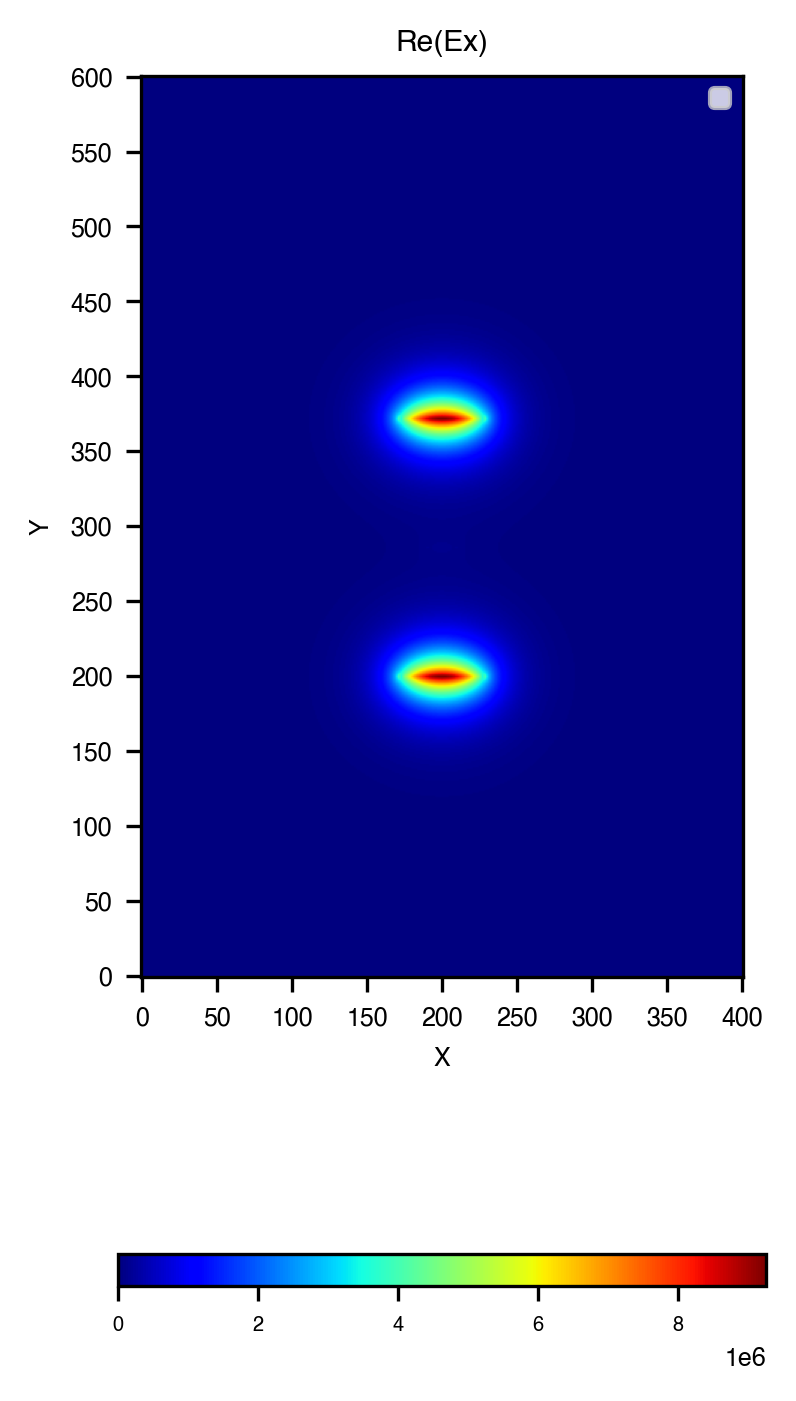

In [13]:
param_dict = {"figsize"        : [8,6],
              "component_list" : ["Re"],
              "fontsize"       : 6,
              "shrink"         : 0.3,
              "xticks"         : xticks,
              "yticks"         : yticks,
              "xtickslabel"    : xticks,
              "ytickslabel"    : yticks}
Plot_field_profile(field, "Ex",**param_dict)